In [1]:
pwd

'C:\\Users\\USER\\Desktop\\Data-Analysis\\5. Deep Learning'

In [2]:
from keras.models import Sequential
from keras.layers import Dense
                                                #오버 학습 방지
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [3]:
import pandas as pd
import numpy
import os
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
# seed 값 설정 (환경을 같게 만들어주어, 딥러닝 실행시 같은 값이 나올 수 있게 해줌)
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(seed)

In [5]:
# 데이터 입력
df_pre = pd.read_csv('./data/wine.csv', header=None)
df_pre

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [22]:
# 데이터 샘플링
df = df_pre.sample(frac=1)  # 랜덤 샘플을 가져오는데, 원본 데이터의 100%를 가져오라는 뜻(frac=0.5로 지정하면 50%만 랜덤으로 가져옴)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
5773,6.3,0.24,0.22,11.90,0.050,65.0,179.0,0.99659,3.06,0.58,9.3,6,0
5043,6.7,0.30,0.44,18.75,0.057,65.0,224.0,0.99956,3.11,0.53,9.1,5,0
4555,8.1,0.12,0.38,0.90,0.034,36.0,86.0,0.99026,2.80,0.55,12.0,6,0
1753,8.2,0.23,0.40,7.50,0.049,12.0,76.0,0.99660,3.06,0.84,9.7,6,0
4799,5.2,0.31,0.36,5.10,0.031,46.0,145.0,0.98970,3.14,0.31,12.4,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3492,6.8,0.24,0.31,18.30,0.046,40.0,142.0,1.00000,3.30,0.41,8.7,5,0
5819,6.0,0.19,0.29,1.20,0.046,29.0,92.0,0.99033,3.22,0.53,11.3,6,0
2814,8.0,0.28,0.42,7.10,0.045,41.0,169.0,0.99590,3.17,0.43,10.6,5,0
4319,7.5,0.26,0.30,4.60,0.027,29.0,92.0,0.99085,3.15,0.38,12.0,7,0


In [23]:
dataset = df.values
dataset

array([[ 6.3 ,  0.24,  0.22, ...,  9.3 ,  6.  ,  0.  ],
       [ 6.7 ,  0.3 ,  0.44, ...,  9.1 ,  5.  ,  0.  ],
       [ 8.1 ,  0.12,  0.38, ..., 12.  ,  6.  ,  0.  ],
       ...,
       [ 8.  ,  0.28,  0.42, ..., 10.6 ,  5.  ,  0.  ],
       [ 7.5 ,  0.26,  0.3 , ..., 12.  ,  7.  ,  0.  ],
       [ 7.7 ,  0.31,  0.36, ..., 12.  ,  5.  ,  0.  ]])

In [24]:
X = dataset[:, 0:12]
Y = dataset[:, 12]

### 데이터 확인

In [25]:
X

array([[ 6.3 ,  0.24,  0.22, ...,  0.58,  9.3 ,  6.  ],
       [ 6.7 ,  0.3 ,  0.44, ...,  0.53,  9.1 ,  5.  ],
       [ 8.1 ,  0.12,  0.38, ...,  0.55, 12.  ,  6.  ],
       ...,
       [ 8.  ,  0.28,  0.42, ...,  0.43, 10.6 ,  5.  ],
       [ 7.5 ,  0.26,  0.3 , ...,  0.38, 12.  ,  7.  ],
       [ 7.7 ,  0.31,  0.36, ...,  0.48, 12.  ,  5.  ]])

In [26]:
Y

array([0., 0., 0., ..., 0., 0., 0.])

In [27]:
# 모델 설정
model = Sequential() #바구니
model.add(Dense(32,  input_dim=12, activation='relu')) #은닉층 1개
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid')) #아웃풋 레이어 3개

In [28]:
#모델 컴파일
model.compile(loss='binary_crossentropy',
           optimizer='adam',
           metrics=['accuracy'])

## 체크포인트 만들어서 모델 저장하기

In [29]:
# 모델 저장 폴더 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR): 
    os.mkdir(MODEL_DIR) # model이라는폴더가 없으면 생성!

# 모델 저장 조건 설정          자리(d:정수 f:소수)
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

## 얼리스타핑 만들어서 과적합 방지

In [30]:
# 학습 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

## 1. 그래프 없이 오차 및 정확도 측정[checkpointer, early_stopping_callback]

In [31]:
# 모델 실행
model.fit(X, Y, validation_split=0.2, epochs=1000, batch_size=200, verbose=0, callbacks=[checkpointer, early_stopping_callback])
# 앞서 저장한 모델보다 나은 결과값(테스트 오차값이 감소)이 나올 때만 모델을 저장한다.


Epoch 00001: val_loss improved from inf to 0.25010, saving model to ./model\01-0.2501.hdf5

Epoch 00002: val_loss improved from 0.25010 to 0.21068, saving model to ./model\02-0.2107.hdf5

Epoch 00003: val_loss improved from 0.21068 to 0.19546, saving model to ./model\03-0.1955.hdf5

Epoch 00004: val_loss improved from 0.19546 to 0.18109, saving model to ./model\04-0.1811.hdf5

Epoch 00005: val_loss improved from 0.18109 to 0.17338, saving model to ./model\05-0.1734.hdf5

Epoch 00006: val_loss improved from 0.17338 to 0.16893, saving model to ./model\06-0.1689.hdf5

Epoch 00007: val_loss improved from 0.16893 to 0.16570, saving model to ./model\07-0.1657.hdf5

Epoch 00008: val_loss improved from 0.16570 to 0.16017, saving model to ./model\08-0.1602.hdf5

Epoch 00009: val_loss improved from 0.16017 to 0.15678, saving model to ./model\09-0.1568.hdf5

Epoch 00010: val_loss improved from 0.15678 to 0.15500, saving model to ./model\10-0.1550.hdf5

Epoch 00011: val_loss improved from 0.15500

In [32]:
# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))

204/204 [==============================] - 0s 342us/step - loss: 0.0619 - accuracy: 0.9818

 Accuracy: 0.9818


## 2. 그래프로 테스트셋 오차, 학습셋 정확도 확인

In [33]:
# 모델 실행 및 저장
history = model.fit(X, Y, validation_split=0.2, epochs=1000, batch_size=200, verbose=1, callbacks=[checkpointer, early_stopping_callback])

Epoch 1/1000
 1/26 [>.............................] - ETA: 0s - loss: 0.0483 - accuracy: 0.9900
Epoch 00001: val_loss did not improve from 0.07412
26/26 [==============================] - 0s 2ms/step - loss: 0.0584 - accuracy: 0.9838 - val_loss: 0.0765 - val_accuracy: 0.9808
Epoch 2/1000
 1/26 [>.............................] - ETA: 0s - loss: 0.0383 - accuracy: 0.9900
Epoch 00002: val_loss did not improve from 0.07412
26/26 [==============================] - 0s 1ms/step - loss: 0.0593 - accuracy: 0.9827 - val_loss: 0.0794 - val_accuracy: 0.9815
Epoch 3/1000
 1/26 [>.............................] - ETA: 0s - loss: 0.1189 - accuracy: 0.9600
Epoch 00003: val_loss did not improve from 0.07412
26/26 [==============================] - 0s 1ms/step - loss: 0.0597 - accuracy: 0.9817 - val_loss: 0.0808 - val_accuracy: 0.9800
Epoch 4/1000
 1/26 [>.............................] - ETA: 0s - loss: 0.0557 - accuracy: 0.9850
Epoch 00004: val_loss did not improve from 0.07412
26/26 [==================

In [34]:
# y_vloss에 테스트셋 오차를 저장
y_vloss = history.history['val_loss']

# y_acc 에 학습셋 정확도를 저장
y_acc = history.history['accuracy']

# y_val_accuracy에 테스트셋 정확도를 저장
y_val_accuracy = history.history['val_accuracy']

In [35]:
y_val_accuracy

[0.9807692170143127,
 0.9815384745597839,
 0.9800000190734863,
 0.9761538505554199,
 0.9807692170143127,
 0.9707692265510559,
 0.9830769300460815,
 0.9784615635871887,
 0.9800000190734863,
 0.9800000190734863,
 0.9830769300460815]

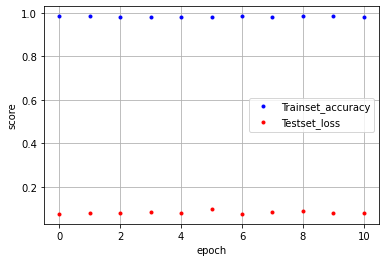


 Test Accuracy: 0.9831


In [36]:
# x값을 지정하고 테스트셋 정확도를 파란색으로, 학습셋 오차를 빨간색으로 표시
x_len = numpy.arange(len(y_acc))

plt.plot(x_len, y_acc, "o", c="blue", markersize=3, label='Trainset_accuracy')
plt.plot(x_len, y_vloss, "o", c="red", markersize=3, label='Testset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('score')

plt.show()

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % y_val_accuracy[-1])